In [1]:
%matplotlib widget
import numpy as np
import time
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.models import mfx
from lcls_beamline_toolbox.xraywavetrace import beam

Can't find epics package. PPM_Imager class will not be supported


In [34]:
# first argument is photon energy, N is a sampling parameter. 
# The wavefront propagation happens on a NxN grid - will affect the resolution of the result.
# Using a GPU will help a lot for N>~256
E0 = 9000
mfx_sim = mfx.MFX(E0,N=512, multi_beam=True)

# ax and/or ay arguments for undulator pointing. These are in units of radians, and based on my understanding, the pivot point of the rotation is about
# the upstream end of the undulators about 100m upstream of the undulator exit.
# mfx_sim.undulator_pointing(ax=1e-6,ay=1e-6)

In [35]:
for num, crl in enumerate(mfx_sim.tfs_list):
    if num==3 or num==5:
    # if num==3:
        crl.enable()
    else:
        crl.disable()
    print('crl {} ({}um ROC) inserted: {}'.format(crl.name,crl.roc*1e6,crl.enabled))

crl tfs_2 (500.0um ROC) inserted: False
crl tfs_3 (300.0um ROC) inserted: False
crl tfs_4 (250.0um ROC) inserted: False
crl tfs_5 (200.0um ROC) inserted: True
crl tfs_6 (125.0um ROC) inserted: False
crl tfs_7 (62.5um ROC) inserted: True
crl tfs_8 (50.0um ROC) inserted: False
crl tfs_9 (50.0um ROC) inserted: False
crl tfs_10 (50.0um ROC) inserted: False


In [4]:
from lcls_beamline_toolbox.utility import util
f_temp = np.zeros(512)
config_list = []
# E0 = 9000
for i in range(512):
    mfx_sim.configure_tfs(tfs_config=i)

    # calculate effective focal length
    s0 = mfx_sim.beamline.prefocus.z - mfx_sim.b1.z_source
    s_out = util.Util.lens_image_distance(s0,mfx_sim.beamline.prefocus.calc_f(E0)) + mfx_sim.beamline.prefocus.z
    for crl in mfx_sim.tfs_list:
        if crl.enabled:
            s_out = util.Util.lens_image_distance(crl.z-s_out,crl.calc_f(E0))+crl.z

    f_temp[i] = s_out - mfx_sim.beamline.MFX_IP.z
    if np.abs(f_temp[i])<.2:
        config_list.append(i)

[17, 18, 104, 161, 193, 194, 196, 280, 289, 290, 292, 321, 322, 324, 360, 388, 424, 456]


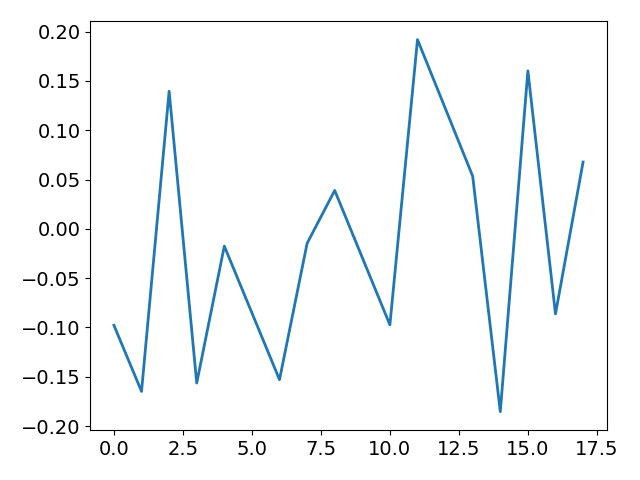

In [5]:
print(config_list)

plt.figure()
plt.plot(f_temp[config_list])

In [6]:
mfx_sim.configure_tfs(tfs_config=config_list[0])
# check which crls are in use
for num, crl in enumerate(mfx_sim.tfs_list):
    # if num>5:
    #     crl.enable()
    # else:
    #     crl.disable()
    print('crl {} ({}um ROC) inserted: {}'.format(crl.name,crl.roc*1e6,crl.enabled))

# calculate effective focal length
s0 = mfx_sim.beamline.prefocus.z - mfx_sim.b1.z_source
s_out = util.Util.lens_image_distance(s0,mfx_sim.beamline.prefocus.calc_f(E0)) + mfx_sim.beamline.prefocus.z
for crl in mfx_sim.tfs_list:
    if crl.enabled:
        s_out = util.Util.lens_image_distance(crl.z-s_out,crl.calc_f(E0))+crl.z

f_temp = s_out - mfx_sim.beamline.MFX_IP.z
print(f_temp)

mfx_sim.tfs_z.mv(-f_temp)
# mfx_sim.tfs_z.mvr(.02)

crl tfs_2 (500.0um ROC) inserted: False
crl tfs_3 (300.0um ROC) inserted: False
crl tfs_4 (250.0um ROC) inserted: False
crl tfs_5 (200.0um ROC) inserted: False
crl tfs_6 (125.0um ROC) inserted: True
crl tfs_7 (62.5um ROC) inserted: False
crl tfs_8 (50.0um ROC) inserted: False
crl tfs_9 (50.0um ROC) inserted: False
crl tfs_10 (50.0um ROC) inserted: True
-0.09780802948012024


True

In [6]:
# random misalignment of all the transfocator lenses
# for i in range(9):
#     getattr(mfx_sim,'tfs_{}_x'.format(i+2)).mvr(2*(np.random.rand(1)-0.5)*50e-6)
#     getattr(mfx_sim,'tfs_{}_y'.format(i+2)).mvr(2*(np.random.rand(1)-0.5)*50e-6)


# set limits
mfx_sim.tfs_z.set_low_limit(-.5)
mfx_sim.tfs_z.set_high_limit(.5)
# mfx_sim.tfs_9_y.mvr(-50e-6)

# test limit
# mfx_sim.tfs_z.mv(0.6)
# # still zero since it doesn't move outside limit
# print(mfx_sim.tfs_z.wm())

# # move within limits (relative move)
# mfx_sim.tfs_z.mvr(.05)
# print(mfx_sim.tfs_z.wm())
mfx_sim.mr1l0_pitch.mvr(0.e-6)

True

In [36]:
mfx_sim.tfs_5_x.mvr(-200e-6)

True

In [37]:
# check which crls are in use
for num, crl in enumerate(mfx_sim.tfs_list):
    # if num>5:
    #     crl.enable()
    # else:
    #     crl.disable()
    print('crl {} ({}um ROC) inserted: {}'.format(crl.name,crl.roc*1e6,crl.enabled))

crl tfs_2 (500.0um ROC) inserted: False
crl tfs_3 (300.0um ROC) inserted: False
crl tfs_4 (250.0um ROC) inserted: False
crl tfs_5 (200.0um ROC) inserted: True
crl tfs_6 (125.0um ROC) inserted: False
crl tfs_7 (62.5um ROC) inserted: True
crl tfs_8 (50.0um ROC) inserted: False
crl tfs_9 (50.0um ROC) inserted: False
crl tfs_10 (50.0um ROC) inserted: False


In [38]:
# run the simulation
tic = time.perf_counter()
mfx_sim.propagate()
toc = time.perf_counter()
print(toc-tic)

1.5959309170000324


[<Axes: title={'center': 'DG3_YAG'}, xlabel='X coordinates (microns)', ylabel='Y coordinates (microns)'>,
 <Axes: >,
 <Axes: >]

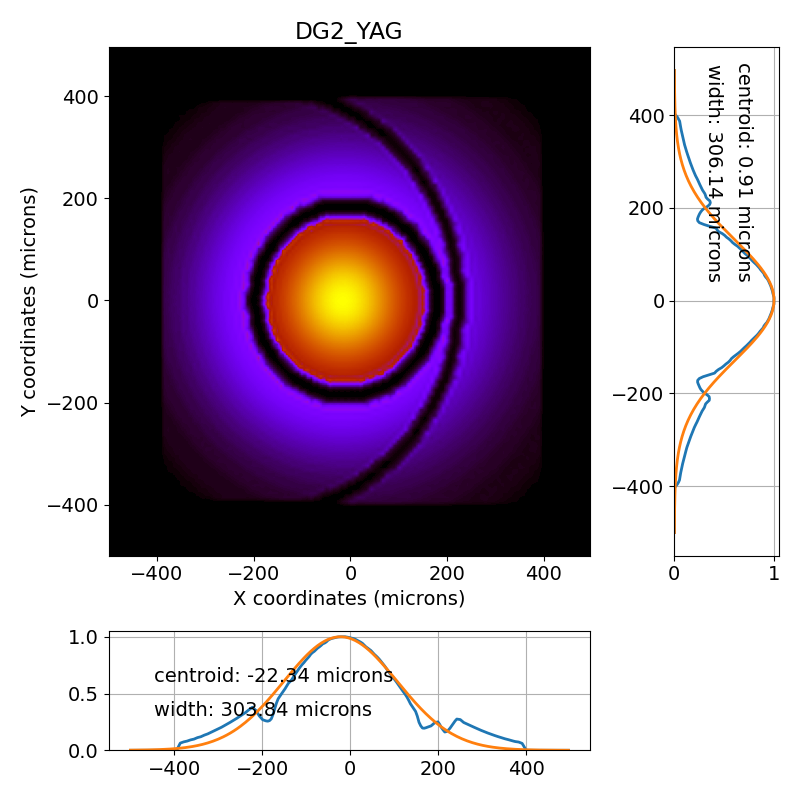

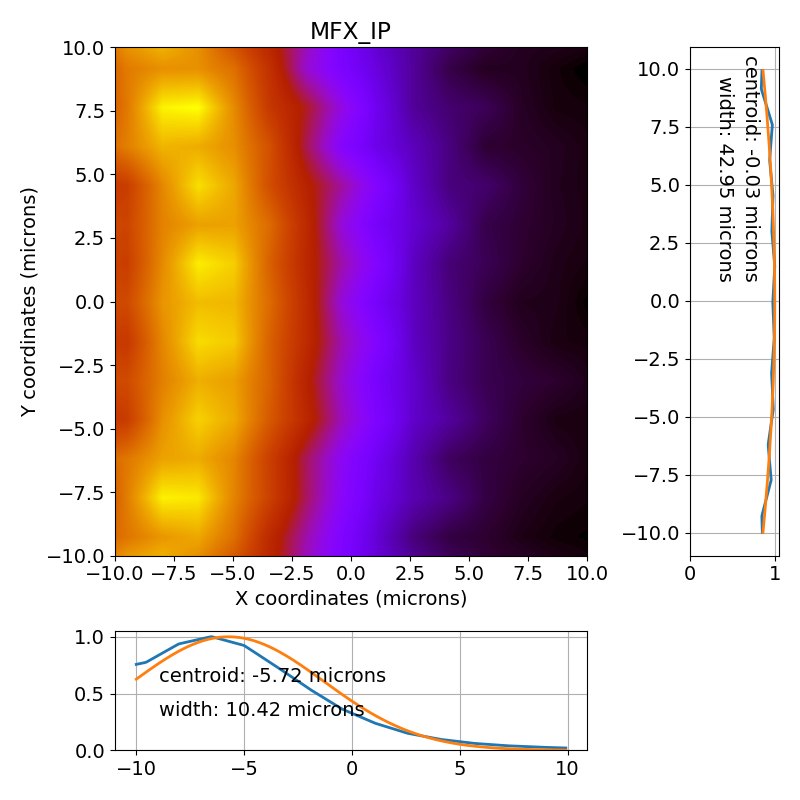

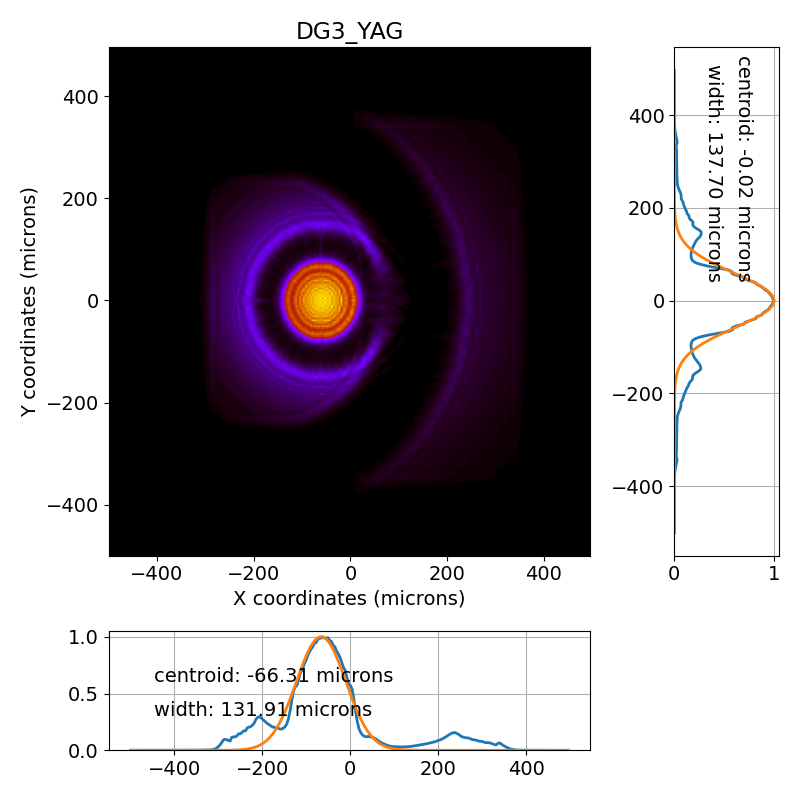

In [39]:
# display results
# mfx_sim.beamline.xcs_yag1.view_beam()
mfx_sim.beamline.DG2_YAG.view_beam()
mfx_sim.beamline.MFX_IP.view_beam()
mfx_sim.beamline.DG3_YAG.view_beam()

In [9]:
import time

In [13]:
beam_params = {
            'photonEnergy': 9500,
            'N': 512,
            'sigma_x': 30e-6,
            'sigma_y': 30e-6,
            'rangeFactor': 5,
            'scaleFactor': 10,
            'z_source': 650 - 26
        }

pulse_test = beam.Pulse(beam_params=beam_params, tau=.01, time_window=.1)

start = time.time()

pulse_test.propagate(beamline=mfx_sim.beamline, screen_names=['DG2_YAG','MFX_IP','DG3_YAG'],cores=8)

end = time.time()

Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported
Can't find epics package. PPM_Imager class will not be supported


In [14]:
print(end-start)

26.838307857513428


(256, 256, 22)
[9035.01723391 9079.30130687 9123.58537983 9167.86945279 9212.15352575
 9256.43759871 9300.72167167 9345.00574464 9389.2898176  9433.57389056
 9477.85796352 9522.14203648 9566.42610944 9610.7101824  9654.99425536
 9699.27832833 9743.56240129 9787.84647425 9832.13054721 9876.41462017
 9920.69869313 9964.98276609]


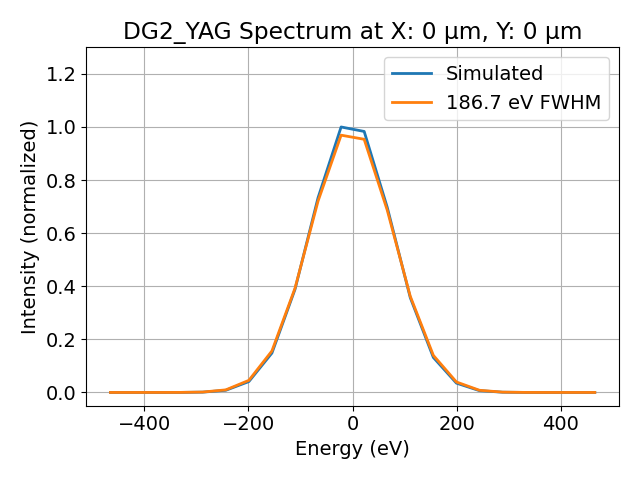

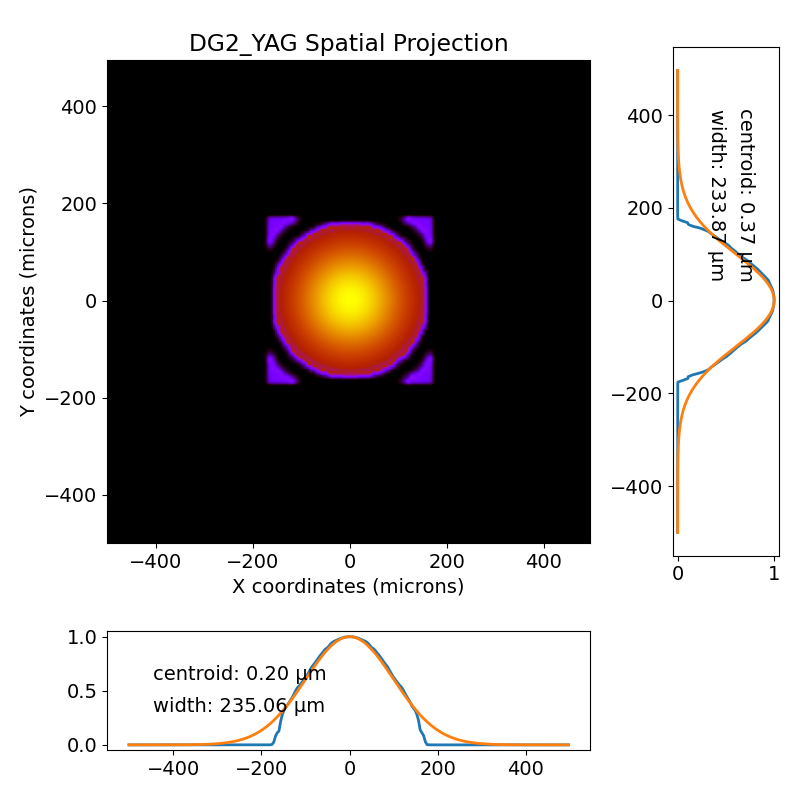

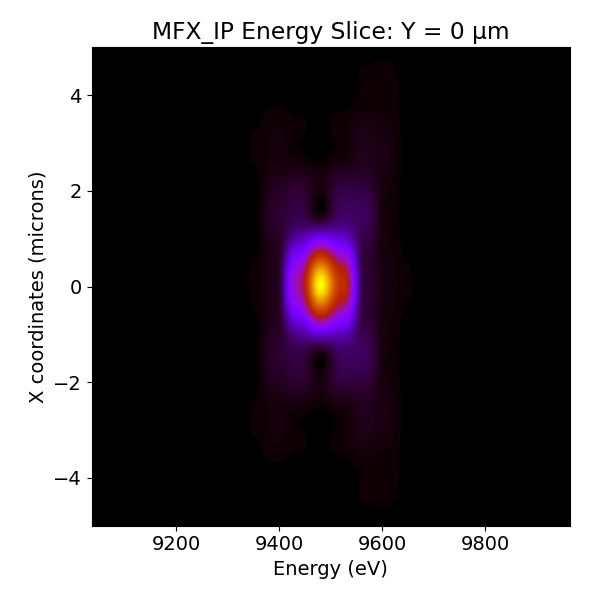

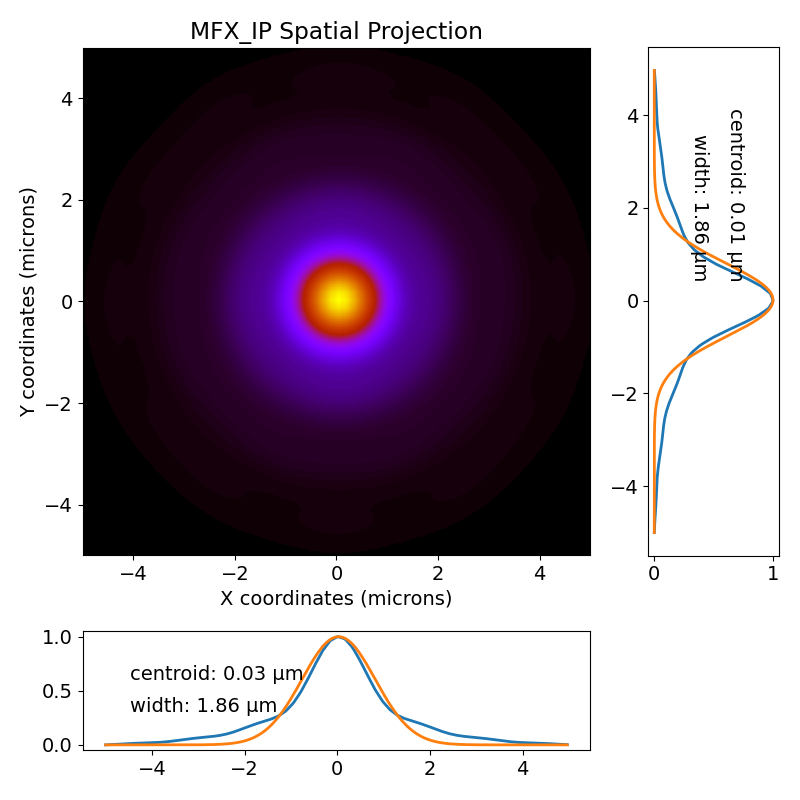

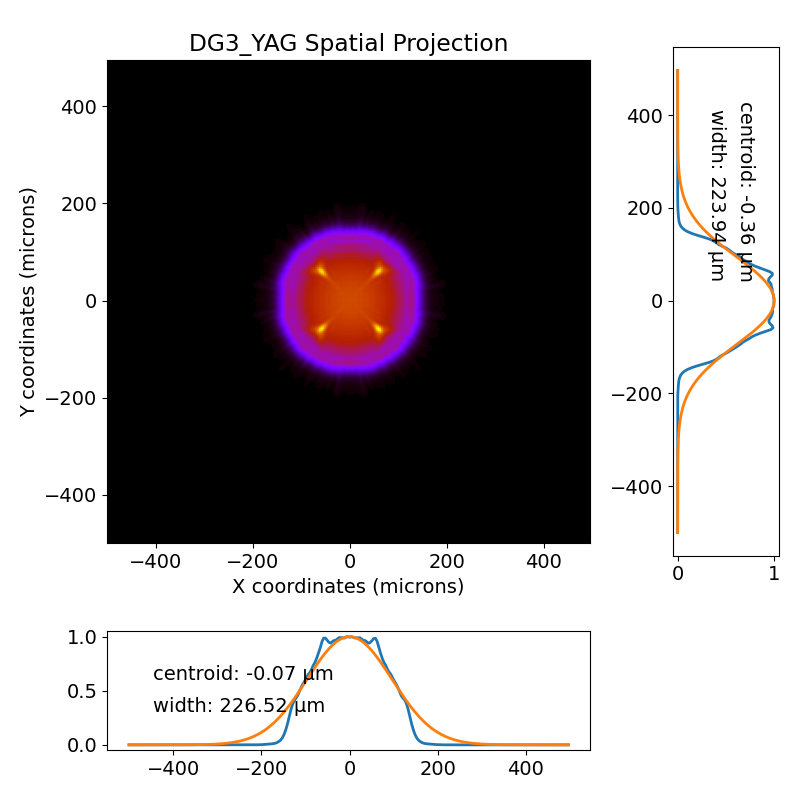

In [15]:
pulse_test.plot_spectrum('DG2_YAG')
pulse_test.imshow_projection('DG2_YAG')
pulse_test.imshow_energy_slice('MFX_IP')
pulse_test.imshow_projection('MFX_IP')
pulse_test.imshow_projection('DG3_YAG')
print(np.shape(pulse_test.energy_stacks['DG2_YAG']))
print(pulse_test.energy)

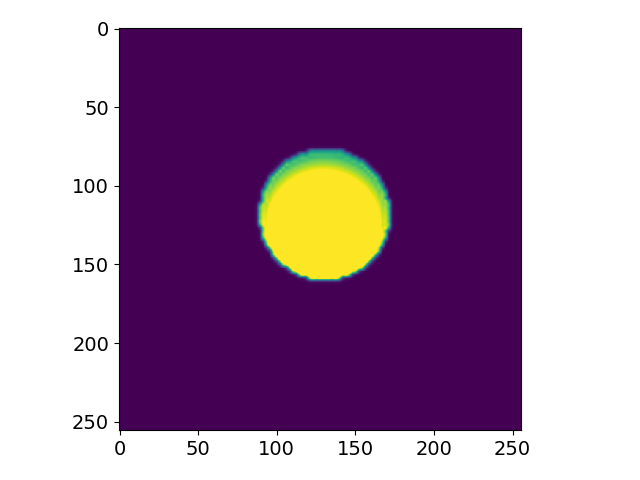

In [8]:
# access to the image array
ip_array = mfx_sim.beamline.DG2_YAG.profile
plt.figure()
plt.imshow(ip_array)
plt.clim(0,.1)

In [7]:
x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)
# x,y = np.meshgrid(x,y)
test = np.zeros((100,100))
mask_x = x>0
mask_y = y>0
print(mask_x)
print(test[mask_y,mask_x])
print(test)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
test[40:60,40:60] = 1

In [9]:
import scipy.interpolate as interpolation
int1 = interpolation.RegularGridInterpolator((y,x), test,fill_value=0)

In [13]:
xo = np.linspace(-50,50,200)
yo = np.linspace(-50,50,200)
xo,yo = np.meshgrid(xo,yo)
out = int1((yo,xo))

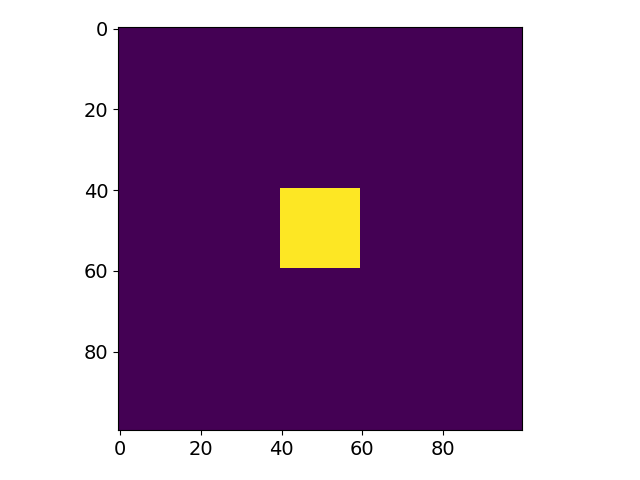

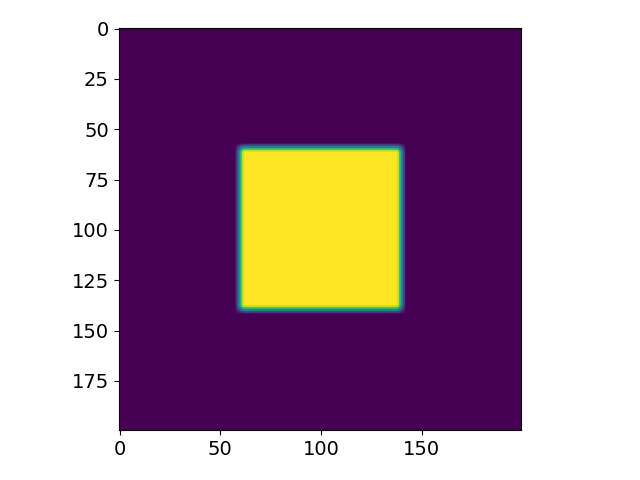

In [15]:
plt.figure()
plt.imshow(test)
plt.figure()
plt.imshow(out)